# Problem Statement
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [402]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [403]:
train =pd.read_csv("/home/vikas/Desktop/DS/2. ds/4. Machine Learning/6. General Concepts/data/loan_sanction_train.csv")
test =pd.read_csv("/home/vikas/Desktop/DS/2. ds/4. Machine Learning/6. General Concepts/data/loan_sanction_test.csv")

In [404]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [405]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Copy Of Original Dataset

In [406]:
train_copy = train.copy()
test_copy= test.copy()

train_copy.head()
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [407]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [408]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [409]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [410]:
len(train) #### No of the Rows in train_dataset

614

In [411]:
train.shape#### No of Rows and col in data set

(614, 13)

In [412]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

>[value_counts]https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [413]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

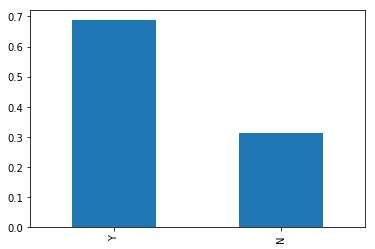

In [414]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

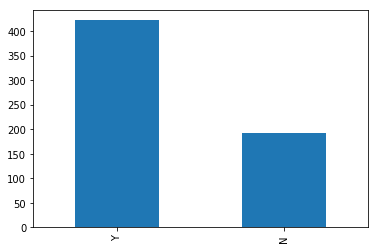

In [415]:
train['Loan_Status'].value_counts(normalize = False).plot.bar()

# Categorical Feature

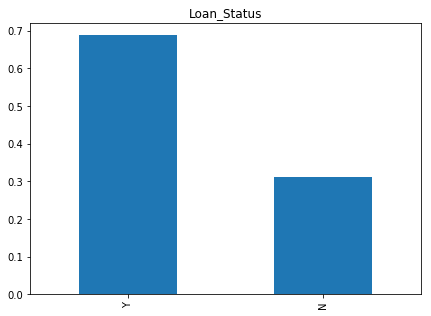

In [416]:
plt.figure()
plt.subplot()
train['Loan_Status'].value_counts(normalize = True).plot.bar(figsize = (7,5),title ='Loan_Status')

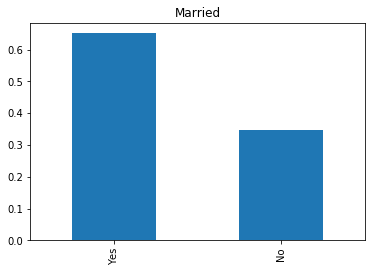

In [417]:
plt.subplot() 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

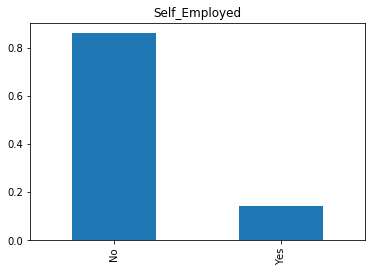

In [418]:
plt.subplot() 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

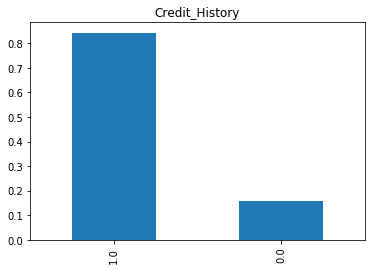

In [419]:
#train['Credit_History'].head()
plt.subplot() 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 


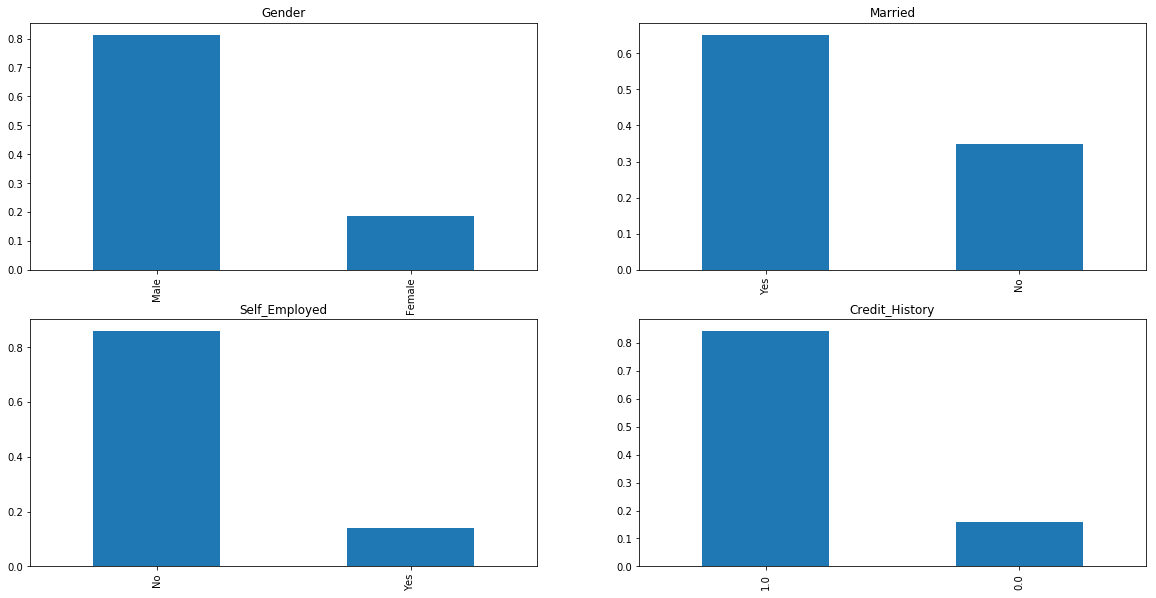

In [420]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

# just practiced

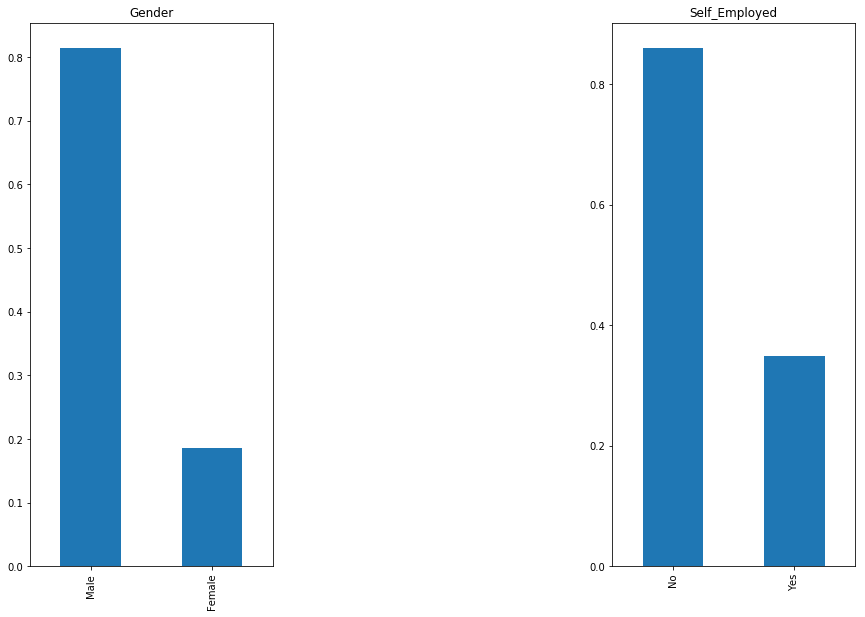

In [421]:
plt.figure(1) ### whole single figure
plt.subplot(141) ## 1 row 4 column position is 1
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(143) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
#plt.subplot(132) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
# plt.subplot(134) 
# train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

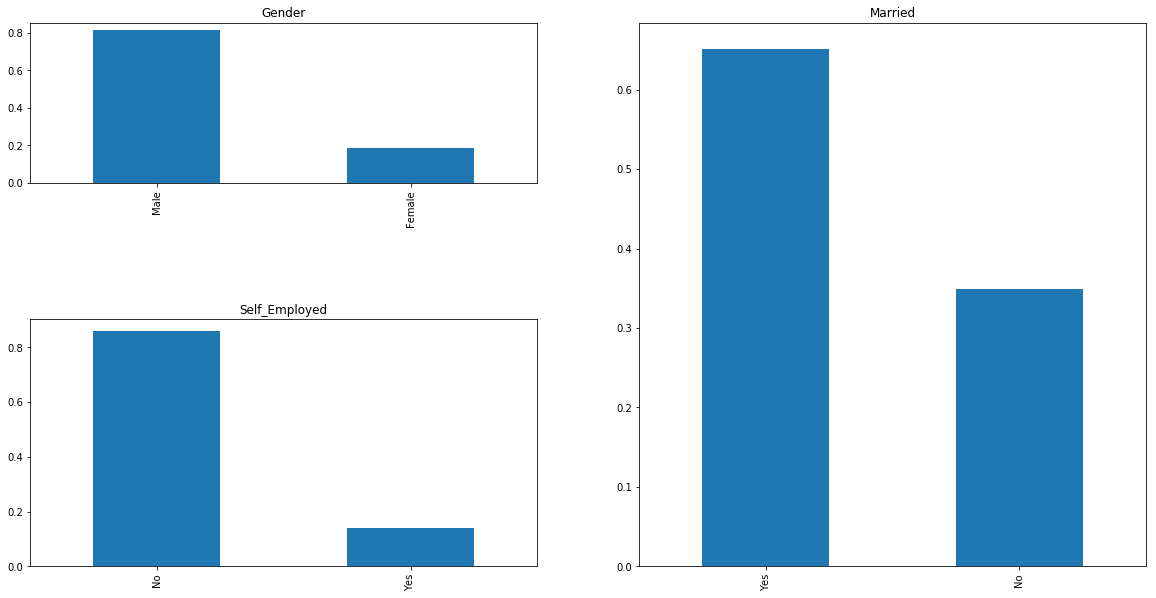

In [422]:
plt.figure(1)
plt.subplot(321)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(122) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
# plt.subplot(134) 
# train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
#plt.show()

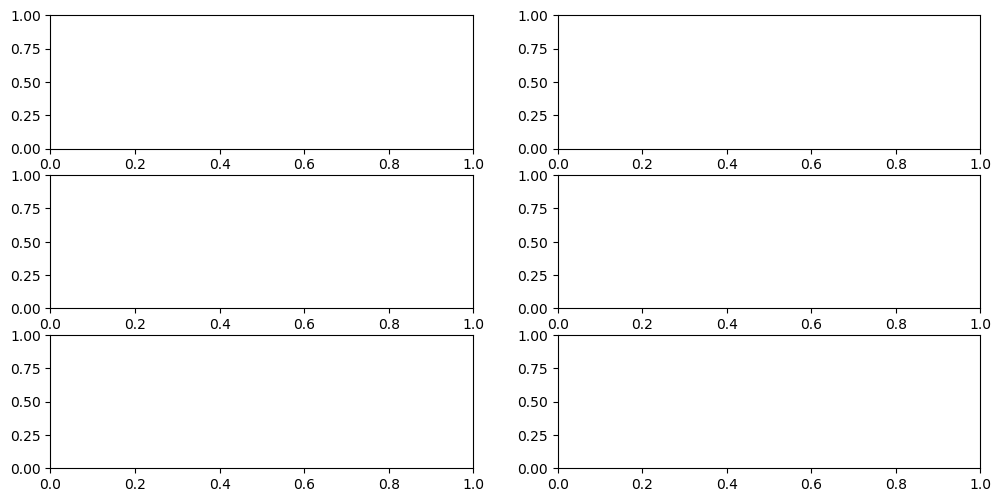

In [423]:
a,b = plt.subplots(3,2,figsize=(12,6),dpi= 100)

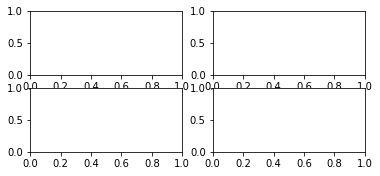

In [424]:
plt.figure(1)
plt.subplot(321)
plt.subplot(322)
plt.subplot(323)
plt.subplot(324)
plt.show()

# rough Work End

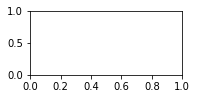

In [425]:
plt.figure(1)
plt.subplot(321)

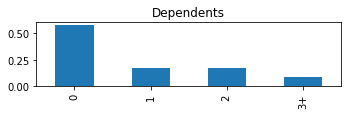

In [426]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')

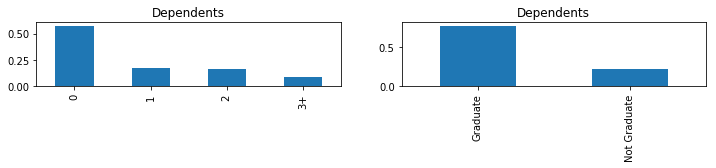

In [427]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,7),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')


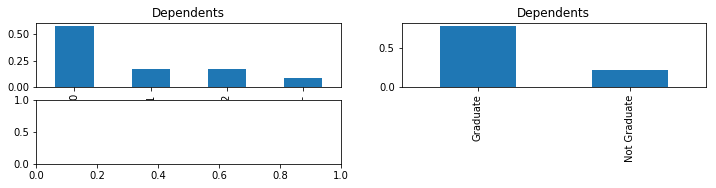

In [428]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)

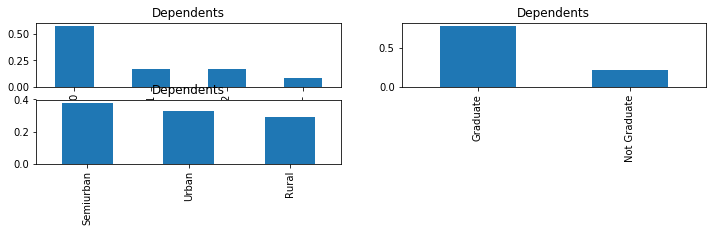

In [429]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')


Below bar plot are plot 2 and then 1 because i decided 3rows and 2 col so thats why it print like that

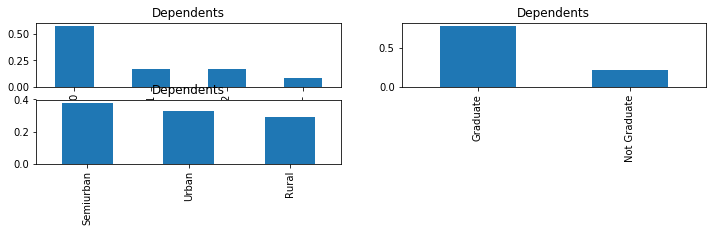

In [430]:
plt.figure(1)
plt.subplot(321)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6),title = 'Dependents')
plt.subplot(322)
train['Education'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.subplot(323)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize = (12,4),title = 'Dependents')
plt.show()

# BoxPlot
>https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

>https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

>https://www.youtube.com/watch?v=BE8CVGJuftI&feature=youtu.be

>[mathematical of Boxplot]https://www.youtube.com/watch?v=sytBDWefYb0

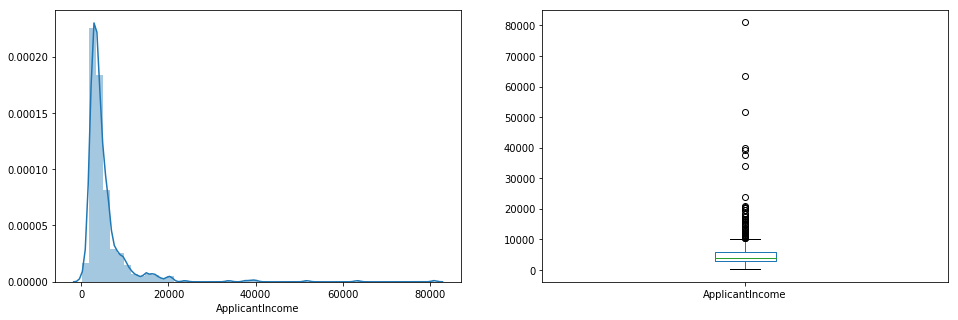

In [431]:
plt.figure(1) 
plt.subplot(121) 
sb.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

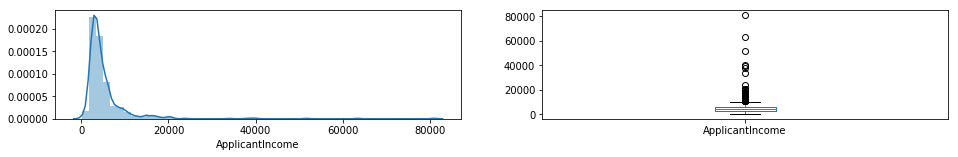

In [432]:
plt.figure(1)
plt.subplot(121) 
sb.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize= (16,2))
plt.show()

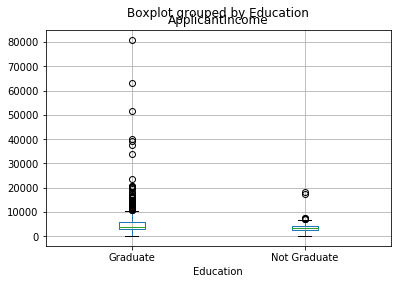

In [433]:
train.boxplot(column = 'ApplicantIncome', by= 'Education' )


Text(0.5,0.98,'')

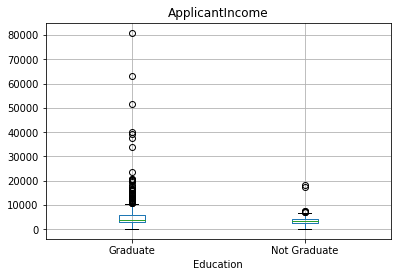

In [434]:
train.boxplot(column = 'ApplicantIncome', by= 'Education' )
plt.suptitle("")

Text(0.5,0.98,'')

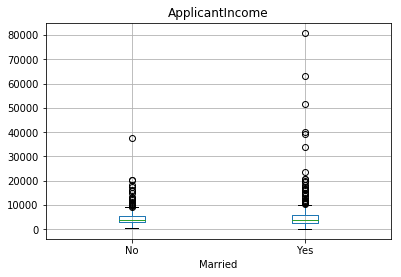

In [435]:
train.boxplot(column = 'ApplicantIncome', by= 'Married' )
plt.suptitle("")

# Categorical Independent Variable vs Target Variable

In [436]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [437]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [438]:
gender.iloc[:,0:].sum()

Loan_Status
N    187
Y    414
dtype: int64

In [439]:
gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

# Single Feature Ploting

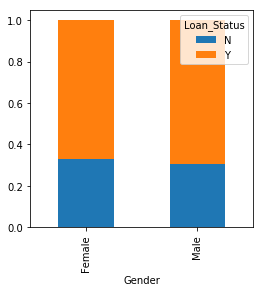

In [440]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
#gender
gender.div(gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

# Try it  on TITANIC Dataset
>http://my-classes.com/lesson/plotting-and-visualization-in-pandas/

>https://pbpython.com/pandas-crosstab.html

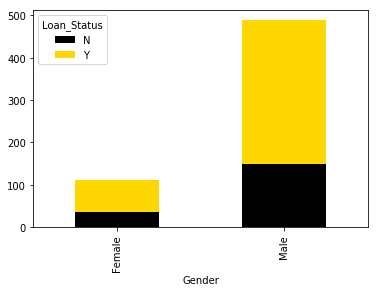

In [441]:
death_counts = pd.crosstab(train['Gender'],train['Loan_Status'])
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

In [442]:
death_counts 
## here i want to check the exact values of 
#black and gold with respect to male and female

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


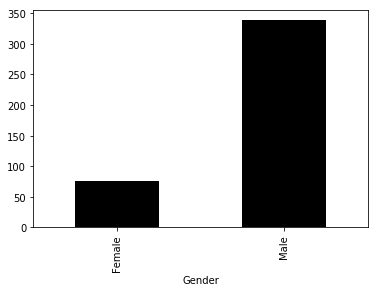

In [443]:
Loan_yes = gender.groupby('Gender').Y.sum().plot(kind='bar',color=['black'])

Loan_yes

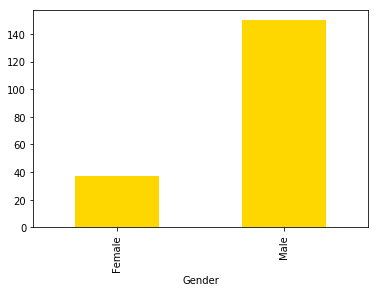

In [444]:
Loan_No = gender.groupby('Gender').N.sum().plot(kind='bar',color=['gold'])
Loan_No

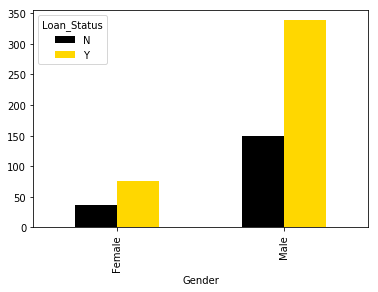

In [445]:
death_counts.iloc[:].plot(kind = 'bar', color= ['black','gold'])
## here i would plot single bar with male and female but 

In [446]:
death_counts.iloc[:]

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


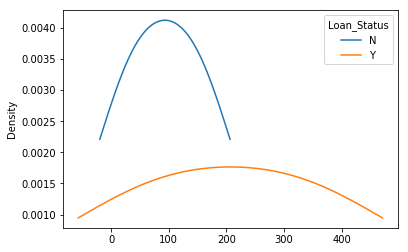

In [447]:
death_counts.iloc[:].plot(kind = 'kde')
# it is not worth to use becuase we didnt understand the what is this  bar plot is good 

# Now Multiple Feature Ploting with Targte Feature
Lets Start

In [448]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Here i am not using the ploting tech

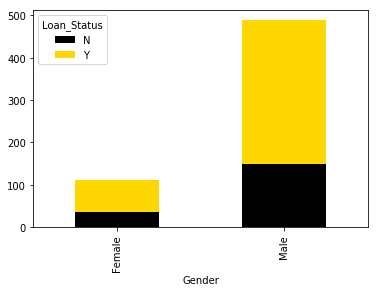

In [449]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

here i am checking the use of Stacked and grid


Stacked is basically stack(one above another) and que(line form)

# here Stacked and grid are True

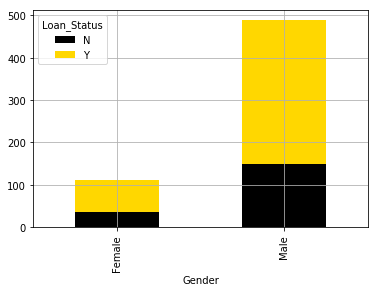

In [450]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=True, color=['black','gold'], grid=True)
# if i am use Grid is tru then it look like below

# here stacked  nad grid are False

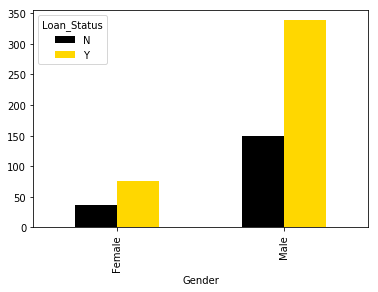

In [451]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
#Gender.div(Gender.sum(1).astype(float),
#           axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Gender.plot(kind='bar', stacked=False, color=['black','gold'], grid=False)
# if i am use Grid is tru then it look like below

# Multiple Feature Ploting with Targte Feature

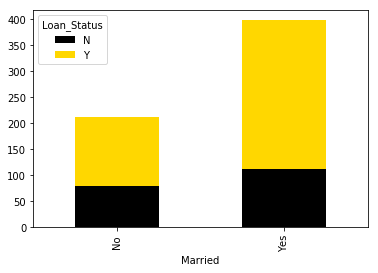

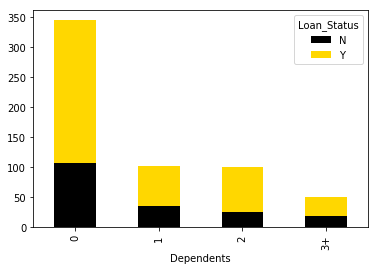

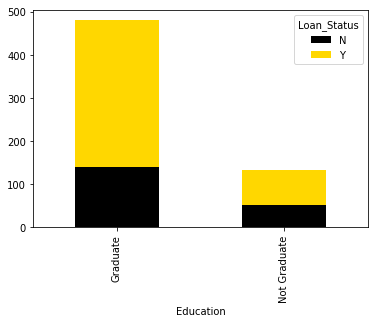

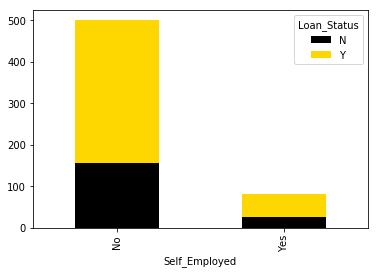

In [452]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Married.plot(kind = 'bar',stacked = True,color = ['black','gold'])
Dependents.plot(kind='bar',stacked = True,color = ['black','gold'])
Education.plot(kind = 'bar',stacked = True,color= ['black','gold'])
Self_Employed.plot(kind = 'bar',stacked =True,color = ['black','gold'])

# Another Categorical freature with Target Feature

In [453]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [454]:
# ApplicantIncome = pd.crosstab(train['ApplicantIncome'],train['Loan_Status'])
# ApplicantIncome.head()
# ApplicantIncome.plot(kind = 'bar',stacked = True ,color=['black','gold'] )

I am checking the Credit_History(LABEL) WITH ANOTHER LABEL(Property_Area)

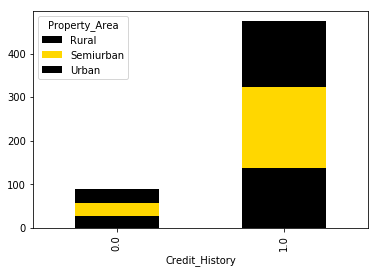

In [455]:
Credit_History = pd.crosstab(train['Credit_History'],train['Property_Area'])
Credit_History.plot(kind = 'bar',stacked = True ,color = ['black','gold'],grid = False)

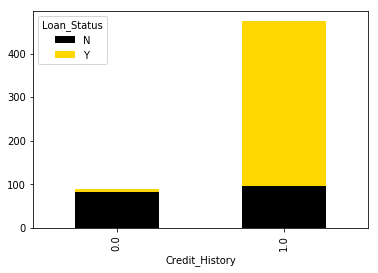

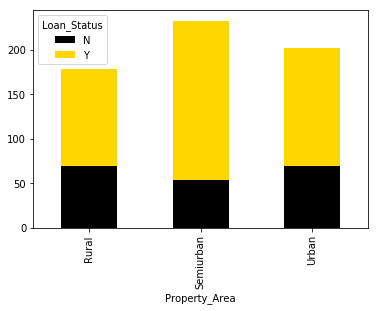

In [456]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.plot(kind = 'bar',stacked = True ,color = ['black','gold'],grid = False)
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.plot(kind = 'bar',stacked = True,color = ['black','gold'])

# Numerical Independent Variable vs Target Variable¶

In [457]:
train.groupby('Loan_Status')['ApplicantIncome'].sum()

Loan_Status
N    1045647
Y    2272077
Name: ApplicantIncome, dtype: int64

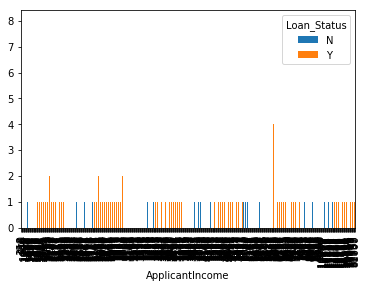

In [458]:
ApplicantIncome = pd.crosstab(train['ApplicantIncome'],train['Loan_Status'])
ApplicantIncome.head()
ApplicantIncome.plot.bar()#(kind = 'bar',stacked = True )

# Above graph generated by using  crosstab butthis plot is understandeble so we need to groupby it for simplicity
used mean()


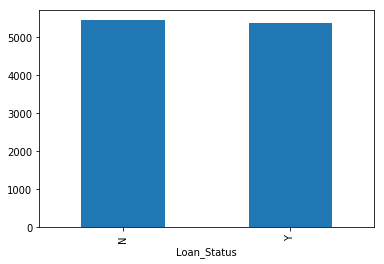

In [459]:
#this is good to undrstand
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

used median() see differ in y scale

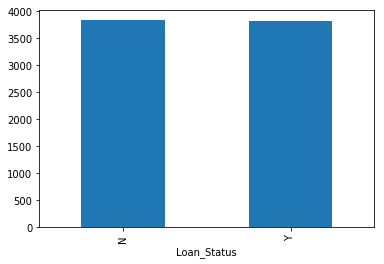

In [460]:
train.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()

# cut()
Operation is used for convrting Continous generated Data to categorical data


here i converting ApplicantIncome(continoues data) to catogorical data for checking realtion with Loan_status

In [461]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [462]:
train ### i is for checking weather is update or not

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high


In [463]:
# bins  = [0,1]
# grp = ['Zero','One']
# train['dependent_bin'] = pd.cut(train['Dependents'],bins,labels = grp)

Text(0,0.5,'Loan_Status')

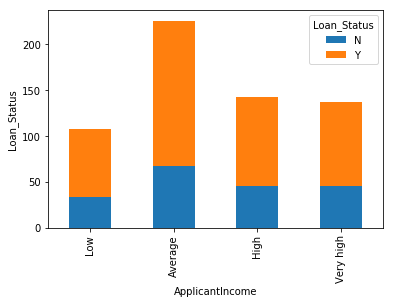

In [464]:
bins=[0,2500,4000,6000,81000]  ##CUT OP CHECK 0-2500,2500-4000 AND SO ON......
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.plot(kind = 'bar',stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel("Loan_Status") ##########comnfused Y LABEL

In [465]:
bins = [0,1000,3000,43000]
grps =['low','Avrage','High']

train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = grps)
#pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])


In [466]:
train.head() ##here check weather this col is created or not [[[[Co_Income_bin]]]]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Avrage
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Avrage
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


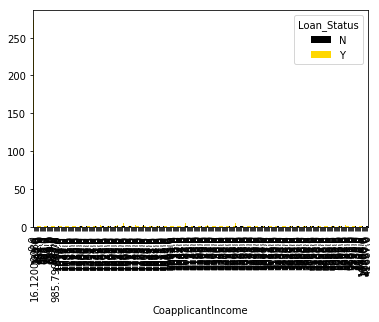

In [467]:
bins = [0,1000,3000,43000]
grps =['low','Avrage','High']
train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = grps)

Co_Income_bin=pd.crosstab(train['CoapplicantIncome'],train['Loan_Status']) ##mistak is here
Co_Income_bin.plot(kind = 'bar',stacked = True,color = ['black','gold'])

# WHY this plot LOOKed liked
Above plot is looked like this because i put 
CoapplicantIncome insted of created Label (i.e Co_Income_bin)
pd.crosstab(train['CoapplicantIncome'],train['Loan_Status'])

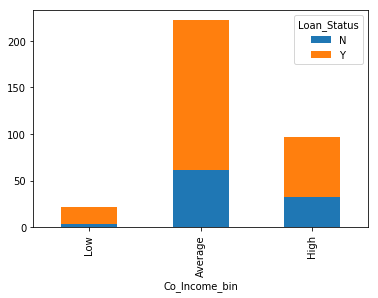

In [468]:
bins=[0,1000,3000,42000]  ##CUT OP CHECK 0-2500,2500-4000 AND SO ON......
grp=['Low','Average','High'] 
train['Co_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=grp)

Income_bin = pd.crosstab(train['Co_Income_bin'],train['Loan_Status'])
Income_bin.plot(kind = 'bar',stacked = True)
# plt.xlabel('ApplicantIncome')
# plt.ylabel("Loan_Status")

# Combinening two feature
#If u have labels which have same entity like (income and Co_income in this data) then u should do this as well

In [469]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0


Text(0,0.5,'Counts')

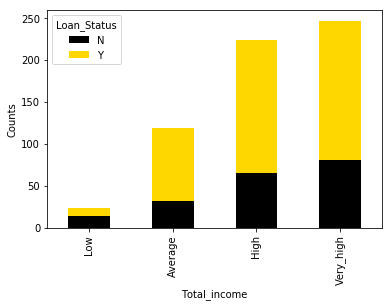

In [470]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000 ,81000]
Label = ['Low','Average','High','Very_high']
train['Total_income'] = pd.cut(train['Total_income'],bins,labels = Label)
Total_income = pd.crosstab(train['Total_income'],train['Loan_Status'])

Total_income.plot(kind = 'bar',stacked = True,color = ['black','gold'],grid = False)
plt.xlabel('Total_income')
plt.ylabel('Counts')

above stmnt, we understand that low total_incone getting less chances Loan_Approve
as compare to other like Average,high,Very_high

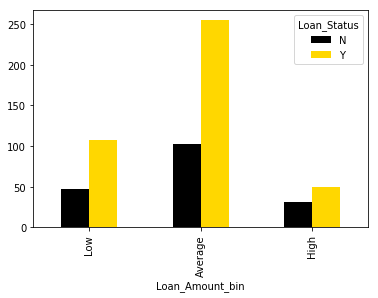

In [471]:
bins = [0,100,200,700]
label_ass =['Low','Average','High'] 
train['Loan_Amount_bin'] = pd.cut(train['LoanAmount'],bins,labels = label_ass)
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
Loan_Amount_bin.plot(kind = 'bar',stacked = False,color = ['black','gold'],grid = False)

 Above Plot  we see the chaances of loan aprove is high when loan_Amount is lesss 

Now i would check the relation ship between these all LAbels that i have created usinbinnn 

In [472]:
train111 = train.copy()
train111

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_income,Loan_Amount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Very_high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,High,Average
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High,High,Very_high,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low,Average,Average,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average,Average,High,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High,Average,High,Average
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high,High,Very_high,High


# Droped Label which are created for more undrstnding

In [473]:
train1 = train.drop(['Income_bin','Co_Income_bin','Total_income','Loan_Amount_bin','Total_income'],axis = 1)

In [474]:
#train1.head() #####Droped all created Labels

# If Feature have Object values then we'll replace its to int for heate map

In [475]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
Income_bin           614 non-null category
Co_Income_bin        341 non-null category
Total_income         614 non-null category
Loan_Amount_bin      592 non-null category
dtypes: category(4), float64(4), int64(1), object(8)
memory usage: 65.4+ KB


In [476]:

# # ctnrl+/  for comment
# ctrl+u =undo selection and ctrl+a select all
# ctrl+home ==go to first cell
# 


In [477]:
train1 = train.drop(['Income_bin','Co_Income_bin','Total_income','Loan_Amount_bin','Total_income'],axis = 1)
train['Dependents'].replace('3+',3,inplace =True)
test['Dependents'].replace('3+',3,inplace = True)
train['Dependents'].replace('N',0,inplace = True)
train['Dependents'].replace('Y',1,inplace =True)


ValueError: Colormap Acent is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

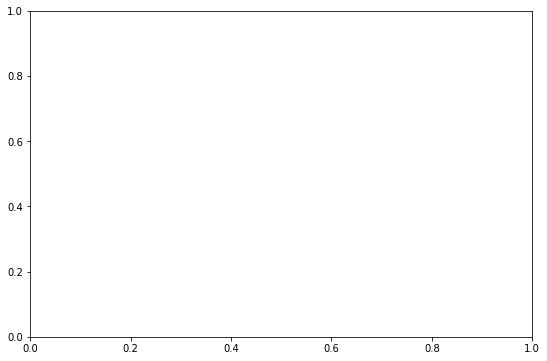

In [478]:
mat= train.corr()
f,ax = plt.subplots(figsize = (9,6))
sb.heatmap(mat,vmax = .8,square =True,cmap = 'Acent')

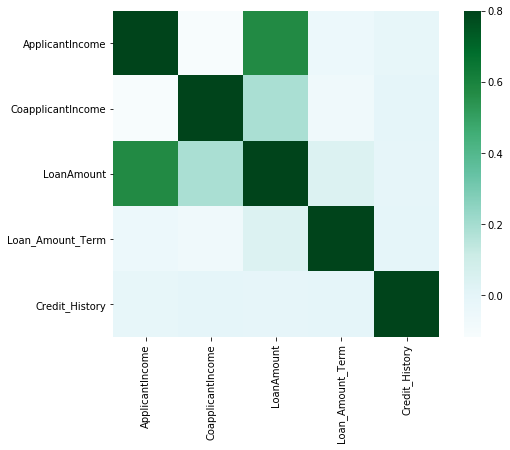

In [479]:
mat= train.corr()
f,ax = plt.subplots(figsize = (9,6))
sb.heatmap(mat,vmax = .8,square =True,cmap = 'BuGn')

In [480]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


# missing values

In [481]:
train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [482]:
train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True)

In [483]:
train1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [484]:
train1['Gender'].mode()[0]    #

'Male'

In [485]:
train1['Gender'].mode()[1]

KeyError: 1

In [486]:
train1['Gender'].fillna(train1['Gender'].mode()[0], inplace=True) 
train1['Married'].fillna(train1['Married'].mode()[0], inplace=True) 
train1['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True) 
train1['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True) 
train1['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True)


In [487]:
train1['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [488]:
train1['Loan_Amount_Term'].fillna(train1['Loan_Amount_Term'].mode()[0], inplace=True)

In [489]:
train1['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)

In [490]:
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [491]:
test['Gender'].fillna(train1['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train1['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train1['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train1['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train1['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train1['LoanAmount'].median(), inplace=True)

# outlier Treatment

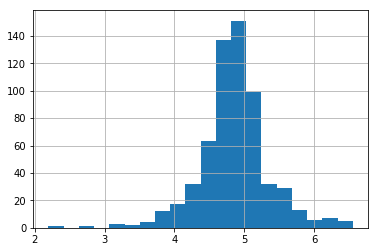

In [492]:
train1['LoanAmount_log'] = np.log(train1['LoanAmount']) 
train1['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Lets Use Algorothms

In [493]:
train11  = train1.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis =1) #  erroe happened because (Loan_ID ) is not present in test dataset

In [494]:
print(train1.columns)
print(test.columns) # this is wrote bcz i want to varify the test and train dataset wrt columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'LoanAmount_log'],
      dtype='object')


In [495]:
x= train11.drop('Loan_Status',1)
y = train.Loan_Status
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [496]:
print(train1.head())

print("\n\n**************\n\n")

print(test.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  LoanAmount_log  
0             1.0         Urban           Y        4.852030  
1             1.0         Rural   

In [497]:
x= train11.drop('Loan_Status',1)
y = train.Loan_Status

In [498]:
x.head() #check the Loan_Status is present or not

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


# here we ll convert the object value into numerical by using one hot encoding

In [499]:
X=pd.get_dummies(x) 
train=pd.get_dummies(train1) 
test=pd.get_dummies(test)

In [500]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [501]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10,test_size = 0.3)

In [502]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [503]:
pred = model.predict(x_test,y_test) ## the error is occured bcz predict take one agr but 3were given by me

TypeError: predict() takes 2 positional arguments but 3 were given

In [505]:
pred_x_test = model.predict(x_test)

In [506]:
model.accuracy_score(y_test,pred_x_test) ###no need to write (model.) at starting

AttributeError: 'LogisticRegression' object has no attribute 'accuracy_score'

In [507]:
accuracy_score(y_test,pred_x_test) 

0.80000000000000004

# Let’s make predictions for the test dataset.

In [508]:
pred_test = model.predict(test)
pred_test

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# Cross Validation

https://www.youtube.com/watch?v=fSytzGwwBVw

Let’s import StratifiedKFold from sklearn and fit the model

In [509]:
from sklearn.model_selection import stratifiedKFold #  S capital

ImportError: cannot import name 'stratifiedKFold'

# StratifiedKFold

In [511]:
from sklearn.model_selection import StratifiedKFold

In [512]:
i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy: 0.798387096774

 1 of kfold 5
Accuracy: 0.83064516129

 1 of kfold 5
Accuracy: 0.811475409836

 1 of kfold 5
Accuracy: 0.795081967213

 1 of kfold 5
Accuracy: 0.827868852459


In [517]:
i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


 1 of kfold 5
Accuracy: 0.798387096774

 2 of kfold 5
Accuracy: 0.83064516129

 3 of kfold 5
Accuracy: 0.811475409836

 4 of kfold 5
Accuracy: 0.795081967213

 5 of kfold 5
Accuracy: 0.827868852459


# AUC and ROC Curve

In [519]:
from sklearn import metrics
fpr,tpr, _ = metrics.roc_curve(yvl,pred)
auc =metrics.roc_curve(yvl,pred)
plt.figure(figsize =(12,8))
plt.plot(fpr,tpr,label = 'Validation,auc ='+str(auc))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

ValueError: Data is not binary and pos_label is not specified

In [398]:
pred

array([ 0.76384171,  0.68853555,  0.40735369,  0.80941587,  0.37126234,
        0.1893165 ,  0.88346095,  0.61178536,  0.79220565,  0.89679957,
        0.77648458,  0.16139966,  0.67815018,  0.17395538,  0.8777621 ,
        0.84074428,  0.6371912 ,  0.77490239,  0.84504926,  0.7440167 ,
        0.76816382,  0.25785841,  0.78016971,  0.68962091,  0.75100573,
        0.92114782,  0.6824212 ,  0.66438169,  0.69903589,  0.46409103,
        0.85229342,  0.66092004,  0.28574329,  0.65325093,  0.9354128 ,
        0.85712004,  0.81420421,  0.85527559,  0.68141522,  0.79036462,
        0.86868203,  0.85953309,  0.64780313,  0.75521908,  0.81252485,
        0.75445408,  0.56366621,  0.62316688,  0.8443706 ,  0.53609685,
        0.82928034,  0.33405156,  0.87871921,  0.64197711,  0.6629688 ,
        0.75629002,  0.86093466,  0.57406017,  0.65969843,  0.65828524,
        0.91696311,  0.12541743,  0.70829266,  0.86796246,  0.82492163,
        0.89384824,  0.87777173,  0.89858474,  0.63526163,  0.68

In [399]:
yvl.head()

2     Y
4     Y
7     N
10    Y
22    N
Name: Loan_Status, dtype: object

In [520]:
yvl=pd.get_dummies(yvl) 
yvl.head()

,N,Y
2,0,1
4,0,1
7,1,0
10,0,1
22,1,0


In [521]:
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

ValueError: multilabel-indicator format is not supported

In [522]:
train1['Total_Income']=train1['ApplicantIncome']+train1['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

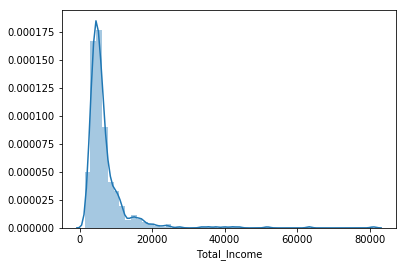

In [531]:
sb.distplot(train1['Total_Income']);

Above dist plot is  shifted towards left, i.e., the distribution is right skewed

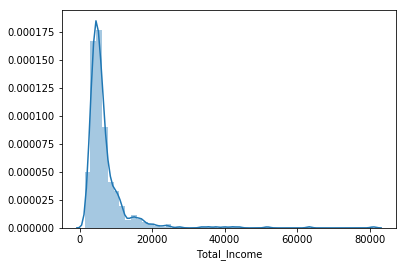

In [530]:
train1['Total_Income_log'] = np.log(train1['Total_Income'])
sb.distplot(train1['Total_Income']);
test['Total_Income_log'] = np.log(test['Total_Income'])

this ABOVE plot is happened same as above bcz i am putting the original label i.e Total_Income insted of
Total_Income_log

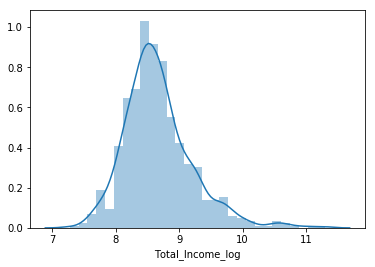

In [528]:
train1['Total_Income_log'] = np.log(train1['Total_Income']) 
sb.distplot(train1['Total_Income_log']); 
test['Total_Income_log'] = np.log(test['Total_Income'])

In [534]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [535]:
train1['EMI']=train1['LoanAmount']/train1['Loan_Amount_Term'] 
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

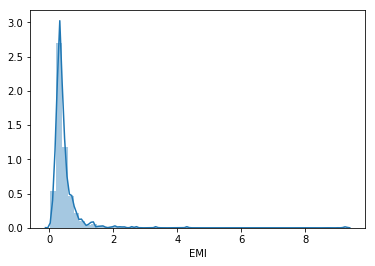

In [536]:
sb.distplot(train1['EMI'])

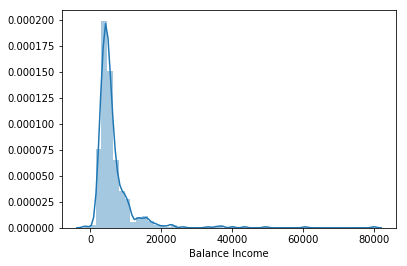

In [548]:
train1['Balance Income']=train1['Total_Income']-(train1['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sb.distplot(train1['Balance Income']);


# we drop those feature which are old

In [549]:
train1=train1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

ValueError: labels ['ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'] not contained in axis

In [541]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,4.948760,6000.0,8.699515,0.391667,5608.333333


In [546]:
train1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income', 'Total_Income_log', 'EMI',
       'Balance Income'],
      dtype='object')

In [547]:
train1.shape

(614, 14)

# Let’s prepare the data for feeding into the models.

In [559]:
x = train1.drop('Loan_Status',1)
Y = train1.Loan_Status

# LogisticRegression

# i = 1
kf = StratifiedKFold(n_splits =5,random_state = 1,shuffle = True)
for  train_index,test_index in kf.split(X,y):
    print('\n {} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state =1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy:',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]

# Decision TREE

In [563]:
from sklearn import tree

In [564]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.66935483871

2 of kfold 5
accuracy_score 0.709677419355

3 of kfold 5
accuracy_score 0.672131147541

4 of kfold 5
accuracy_score 0.672131147541

5 of kfold 5
accuracy_score 0.72131147541


# Random Forest

In [565]:
from sklearn.ensemble import RandomForestClassifier

In [566]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.806451612903

2 of kfold 5
accuracy_score 0.758064516129

3 of kfold 5
accuracy_score 0.713114754098

4 of kfold 5
accuracy_score 0.729508196721

5 of kfold 5
accuracy_score 0.770491803279


# hyperparameter 
grid

In [586]:
from sklearn.model_selection import GridSearchCV

In [587]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
paramgrid

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}

In [588]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
grid_search

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [589]:
from sklearn.model_selection import train_test_split

In [590]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state = 10,test_size= 0.3)

In [591]:
grid_search.fit(x_train,y_train)

ValueError: could not convert string to float: 'Rural'